In [32]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Questions
1 - What are top 15 best companies?<br>
2 - How review vary based on if the reviewer is a current, former employee or a contractor?<br>
3 - What is the recommendation rate?

## Look at the data

After, the business understanding, this represent the second step of the CRISP-DM methology, the data understanding. Let's look at the dataset and get confortable with the data it hold.

In [33]:
def print_divider(message):
    print(f"=================== {message} ==============================")

#### Gather data
Load the data in to the notebook and print the 5 first rows

In [34]:
df = pd.read_csv('glassdoor_reviews.csv')
print_divider("DF Shape")
df.head()

=================== DF Shape ==============================


,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
0,AFH-Wealth-Management,2015-04-05,,Current Employee,NaN,2,4.0,3.0,NaN,2.0,3.0,3.0,x,o,r,"Young colleagues, poor micro management",Very friendly and welcoming to new staff. Easy...,"Poor salaries, poor training and communication."
1,AFH-Wealth-Management,2015-12-11,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",2,3.0,1.0,NaN,2.0,1.0,4.0,x,o,r,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...
2,AFH-Wealth-Management,2016-01-28,Office Administrator,"Current Employee, less than 1 year","Bromsgrove, England, England",1,1.0,1.0,NaN,1.0,1.0,1.0,x,o,x,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very..."
3,AFH-Wealth-Management,2016-04-16,,Current Employee,NaN,5,2.0,3.0,NaN,2.0,2.0,3.0,x,o,r,Over promised under delivered,Nice staff to work with,No career progression and salary is poor
4,AFH-Wealth-Management,2016-04-23,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",1,2.0,1.0,NaN,2.0,1.0,1.0,x,o,x,client reporting admin,"Easy to get the job, Nice colleagues.","Abysmal pay, around minimum wage. No actual tr..."


#### Access data
Show the values and the type of data inside the recommend and overall_rating, these two are the most important for our ananlysis.

In [35]:
df[['recommend', 'overall_rating']].values

array([['x', 2],
       ['x', 2],
       ['x', 1],
       ...,
       ['v', 4],
       ['o', 5],
       ['v', 5]], dtype=object)

In [36]:
print_divider("DF Summary")
df.describe()

=================== DF Summary ==============================


,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt
count,838566.000000,688672.000000,647193.000000,136066.000000,691065.000000,688484.000000,682690.000000
mean,3.655956,3.375735,3.590164,3.966612,3.461825,3.398109,3.176576
std,1.174684,1.305874,1.323280,1.190937,1.271295,1.218738,1.330720
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000
75%,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


List of the columns in the dataset with their corresponding missing value in percentage.

In [37]:
# List of columns with missing  data percentage  
df.isnull().mean().sort_values(ascending=False)

diversity_inclusion    0.837740
location               0.354579
culture_values         0.228215
senior_mgmt            0.185884
comp_benefits          0.178975
work_life_balance      0.178750
career_opp             0.175897
headline               0.002646
cons                   0.000010
date_review            0.000000
overall_rating         0.000000
current                0.000000
recommend              0.000000
ceo_approv             0.000000
outlook                0.000000
job_title              0.000000
pros                   0.000000
firm                   0.000000
dtype: float64

#### Access data

Let's list the different type of reviewer we have in the current column.

<AxesSubplot: >

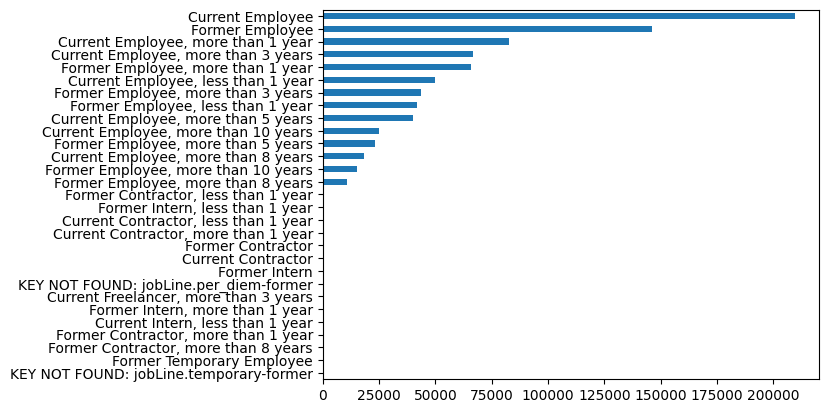

In [38]:
# List of the different type of person
type_of_person = df['current'].value_counts()
type_of_person.sort_values().plot(kind='barh')

#### Access data
It's time for us to look at the companies column

In [39]:
# List of firms and job titles
firms = df[['firm']].value_counts()
firms

firm                    
IBM                         60436
McDonald-s                  49450
Deloitte                    46995
EY                          34050
PwC                         33227
                            ...  
i-Net-Solution                  4
Health-Protection-Agency        4
The-Survey-Association          3
NPSA                            2
UKCIL                           1
Length: 428, dtype: int64

### Q1 - What are top 15 best companies?<br>
To list the top best companies, we will lookup the firm and overall_rating columns.
Answering this question using a simple average will not give an accurate result. Since the number of review can vary from a company to another, for example a company A have 1000 reviews with a mix of good and bad reviews, another company have only two review but they are all 5 rated. We need a minimum number of review to try to normalise this difference. If you are using the same dataset C = 113

# Gather data
Let get the columns we are interested in

In [40]:
top_companies_df = df[['firm', 'overall_rating']]
top_companies_df.head()

,firm,overall_rating
0,AFH-Wealth-Management,2
1,AFH-Wealth-Management,2
2,AFH-Wealth-Management,1
3,AFH-Wealth-Management,5
4,AFH-Wealth-Management,1


In [41]:
# Check data types
top_companies_df.dtypes

firm              object
overall_rating     int64
dtype: object

# Clean data
Missing data in the firm column isn't useful for us since we can't guess or compute the name of the corresponding company the review was for. Let's drop them then convert the data type to String.

In [42]:
# Drop rows where the firm column is missing
top_companies_df = top_companies_df.dropna(subset='firm', axis=0)

# Convert firm values to string
top_companies_df["firm"] = top_companies_df["firm"].astype('string', errors='raise')

A missing value for the overall_reating column mean 0 for us, so let's fill those value with 0.

In [43]:

# fill rows where the overall_rating is missing with 0
top_companies_df['overall_rating'] = top_companies_df['overall_rating'].fillna(0)

top_companies_df.dtypes

firm              string
overall_rating     int64
dtype: object

#### Access Data
Here is where we take care of the bayesian average calculus

In [44]:
# Let create necessary variable for a bayesian average calculation
# Details for bayesian average here => shorturl.at/kGPZ5
m = top_companies_df['overall_rating'].sum() / top_companies_df['overall_rating'].count()
# Calcuate the confidence number of ranking
c = top_companies_df['firm'].value_counts().quantile(q=.25)

#Calculate the ratings averages
ratings_avgs = top_companies_df.groupby('firm')['overall_rating'].mean()

#Calculate the ratings counts
ratings_counts = top_companies_df.groupby('firm')['overall_rating'].count()

<AxesSubplot: title={'center': 'TOP 15 BEST COMPANIES'}, xlabel='Overall rating', ylabel='Companies'>

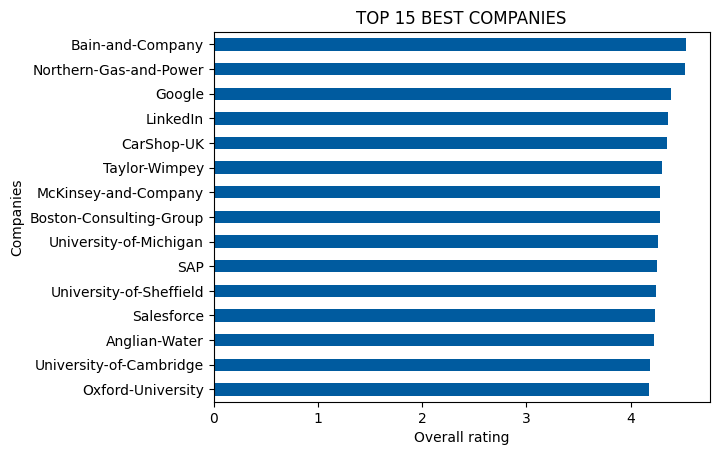

In [45]:
#Apply the bayesian average and create a new data frame
bayes_average_df = ((ratings_counts * ratings_avgs) + (c * m)) / (ratings_counts + c)

# Plot the list of the top 15 best companies
bayes_average_df.nlargest(15).sort_values().plot(title="TOP 15 BEST COMPANIES", color='#005b9f', kind='barh', xlabel="Overall rating", ylabel="Companies")

## Q2: How review vary based on if the reviewer is a current, former employee or a contractor?

Looking at the current column, we can see there is different type of person(employee)
giving review, let see how the review vary base on them.

#### Gather data

In [46]:
person_type_df = df[['current', 'overall_rating']]

#### Clean data

In [47]:
def replace_value(df, column_name, old_value, new_value):
    """Given a dataframe, a column name the old and new values
    it replace the old value by the new one

    Args:
        df (pandas dataFrame): the dataframe
        column_name (str): the column name
        old_value (str)
        new_value (str)
    Retrun:
        df (pandas dataFrame)
    """
    df[column_name] = df[column_name].str.replace(old_value,new_value)
    return df

person_type_df['current'] = person_type_df['current'].str.split(',')\
    .apply(lambda x: x[0])
    
replace_value(person_type_df, 
                'current', 
                'KEY NOT FOUND: jobLine.temporary-former', 
                'Former Temporary Employee')

replace_value(person_type_df, 
                'current', 
                'KEY NOT FOUND: jobLine.per_diem-former', 
                'Former Employee')

/var/folders/4z/s162k0n14kdbk3y30lf8z80c0000gn/T/ipykernel_16679/4232118310.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  person_type_df['current'] = person_type_df['current'].str.split(',')\
/var/folders/4z/s162k0n14kdbk3y30lf8z80c0000gn/T/ipykernel_16679/4232118310.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column_name] = df[column_name].str.replace(old_value,new_value)
/var/folders/4z/s162k0n14kdbk3y30lf8z80c0000gn/T/ipykernel_16679/4232118310.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

,current,overall_rating
0,Current Employee,2
1,Current Employee,2
2,Current Employee,1
3,Current Employee,5
4,Current Employee,1
...,...,...
838561,Current Employee,5
838562,Current Employee,3
838563,Current Employee,4
838564,Current Employee,5


In [48]:
person_type_df['current'] = person_type_df['current'].astype('string')

/var/folders/4z/s162k0n14kdbk3y30lf8z80c0000gn/T/ipykernel_16679/3552306037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  person_type_df['current'] = person_type_df['current'].astype('string')


#### Visualize data

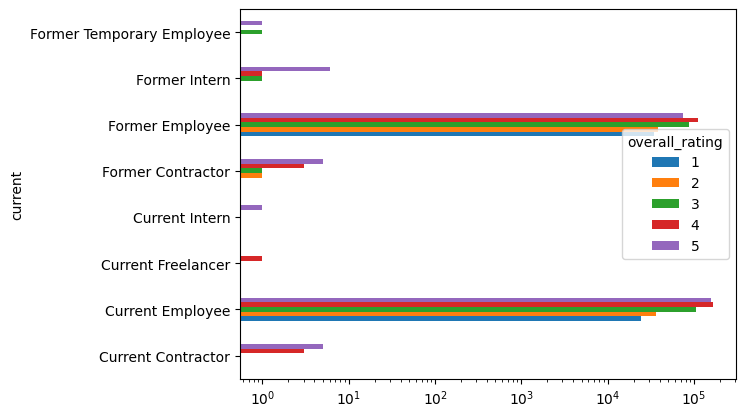

In [49]:
result_df = person_type_df.groupby(['current', 'overall_rating']).value_counts().unstack(level=1)
result_df.plot.barh().set_xscale('log')

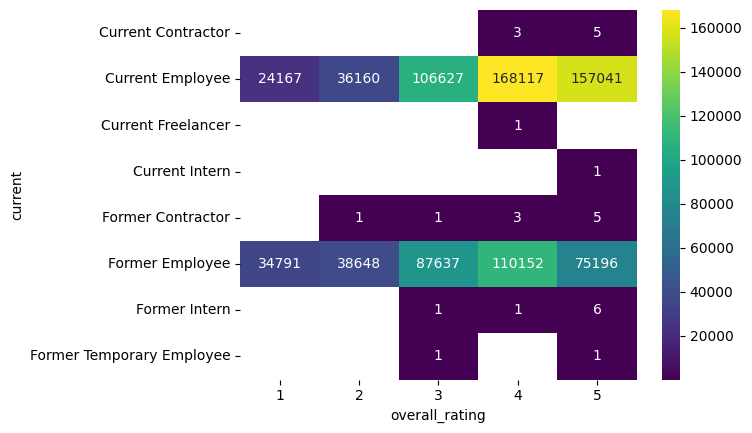

In [50]:
sns.heatmap(result_df, annot=True, fmt="g", cmap='viridis')
plt.show()

From the above chart, one can conclude that current employees are the first one to give a review to their companies, then former employee follow. Contractors don't use to give a review but when they do they give a good overall review. Former employees are the first group of reviewers which give a bad overall rating.

Q3 - What is the recomendation rate?


#### Gather data

In [51]:
recom_rate_df = df['recommend']

To answer this question we will look at the recommend columns
As the values in the column can be grouped in three different categories, we will convert it data type to categorical data.
Then get the values count and print them base on their the average percentage 

#### Visualise data

/var/folders/4z/s162k0n14kdbk3y30lf8z80c0000gn/T/ipykernel_16679/2113574802.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  result.set_yticklabels([f'{x/df.shape[0]:.0%}' for x in result.get_yticks()])


<AxesSubplot: >

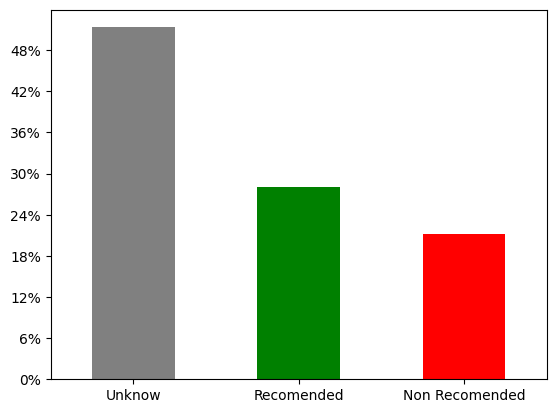

In [52]:

# Convert the the data type to categorical
recom_rate_df = recom_rate_df.astype('category')
# Create the result plot

result = recom_rate_df.value_counts().plot(kind='bar', color=['grey', 'green', 'red'], rot=0)
result.set_xticklabels(['Unknow', 'Recomended', 'Non Recomended'])

# Set the the Y axis to the average percentage of each category of value
result.set_yticklabels([f'{x/df.shape[0]:.0%}' for x in result.get_yticks()])
result

## References
glassdoor_reviews dataset: https://www.kaggle.com/datasets/davidgauthier/glassdoor-job-reviews <br>
Medium: https://medium.com/@emmanoedorh/udacity-data-scientist-nanodegree-63f3ca2b7189 <br>